### Churn Classification
### Fabricio Crespo
### Abril 28, 2025.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
# Leer archivo CSV.
df = pd.read_csv("Churn_Modelling.csv")  

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Evaluar si tenemos valores nulos en nuestro dataset y tratarlos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


En este caso, no tenemos ningun dato nulo que tratar.

In [6]:
df.duplicated().sum()

0

Tampoco tenemos datos duplicados en nuestro dataset.

Eliminar columnas que no aportan información relevante al estudio.

In [7]:
#Eliminar columnas innecesarias
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

Codificar las variables categoricas 'Geography' y 'Gender' para tener todas nuestras variables en formato numerico.

In [8]:
# Usamos OneHotEncoding para 'Geography' y LabelEncoding para 'Gender'. Esto debido a la naturaleza de las columnas. Geography tiene multiples valores, y gender solo 2.
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male = 1, Female = 0

Dividir nuestras variables independientes y dependientes.

In [9]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

Dividir nuestro conjunto de entrenamiento. Asumiendo que nuestro dataset esta desbalanceado, utilizamos el argumento stratify para tener equidad en la división de datos.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Escalar nuestros datos divididos.

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### MLP

Implementar nuestro algoritmo MLP para clasificación.

In [12]:
# Crear y entrenar el modelo de perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

c:\Users\cmoncada\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [13]:
# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

Imprimir los resultados de la clasificacion. Principalmente el accuracy, y metricas complementarias como precision, recall y f1-score.

In [17]:
# Imprimir el reporte de clasificación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Visualizar la matriz de confusión y entender como se esta distribuyendo nuestra clasificacion.

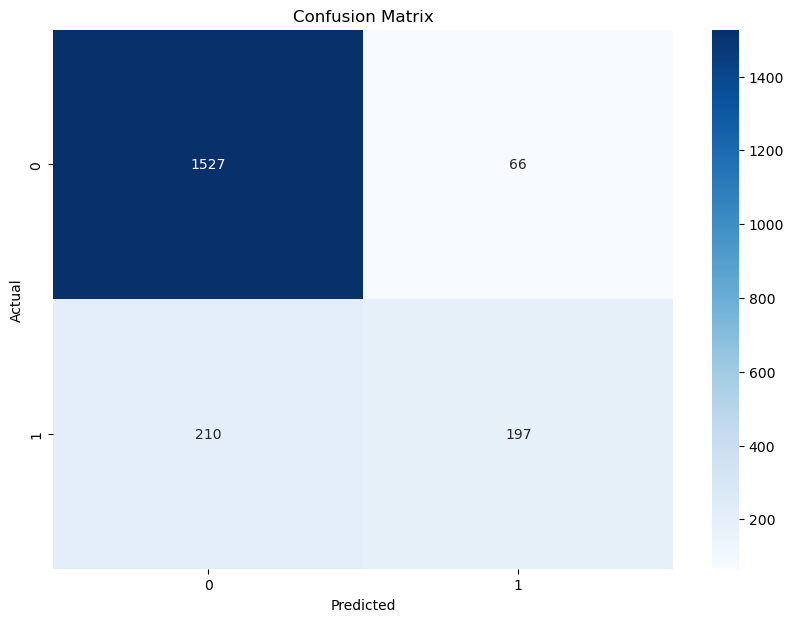

In [16]:
cm = confusion_matrix(y_test, y_pred)
# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# NO FUNCIONO EL BALANCEO DE DATOS, DESMEJORA EL ALGORITMO!

Balanceando el Dataset

Random Over-Sampling


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [37]:
# Balancear los datos utilizando Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [38]:
# Crear y entrenar el modelo de perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

c:\Users\cmoncada\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [39]:
# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

In [40]:
# Imprimir el reporte de clasificación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7905
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.70      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Random Under-Sampling


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

In [42]:
# Balancear los datos utilizando Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [43]:
# Crear y entrenar el modelo de perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

c:\Users\cmoncada\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [44]:
# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

In [45]:
# Imprimir el reporte de clasificación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.771
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.78      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000

